<a href="https://colab.research.google.com/github/vicentcamison/idal_ia3/blob/main/2%20Aprendizaje%20profundo%20(I)/Sesion%203/2_CNN_SM_1D_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
# Installa TensorFlow
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
import numpy as np

# Database
https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs

# Veamos los datos


In [ ]:
import pandas as pd

In [ ]:
# Leer los datos 
# En local: tenemos que tener el fichero en la misma carpeta que el notebook (o cambiar la ruta)
# En Colab: abre la carpeta (usando el boton de la izquierda) y arrastralos dentro desde tu ordenador.
dataset = pd.read_csv("googl.us.txt", delimiter=",")

In [ ]:
# Tenemos 5 datos por dia
dataset

,Date,Open,High,Low,Close,Volume,OpenInt
0,2004-08-19,50.000,52.03,47.980,50.170,44703800,0
1,2004-08-20,50.505,54.54,50.250,54.155,22857200,0
2,2004-08-23,55.375,56.74,54.525,54.700,18274400,0
3,2004-08-24,55.620,55.80,51.785,52.435,15262600,0
4,2004-08-25,52.480,54.00,51.940,53.000,9197800,0
...,...,...,...,...,...,...,...
3328,2017-11-06,1049.100,1052.59,1042.000,1042.680,913954,0
3329,2017-11-07,1049.650,1053.41,1043.000,1052.390,1303832,0
3330,2017-11-08,1050.050,1062.69,1047.050,1058.290,1214469,0
3331,2017-11-09,1048.000,1050.88,1035.850,1047.720,1793994,0


In [ ]:
# Estos son los datos de apertura
dataset['Open']

0         50.000
1         50.505
2         55.375
3         55.620
4         52.480
          ...   
3328    1049.100
3329    1049.650
3330    1050.050
3331    1048.000
3332    1043.870
Name: Open, Length: 3333, dtype: float64

In [ ]:
# Nos guardamos la serie de apertura en la variable 'aa'
aa = dataset['Open']
aa.shape

(3333,)

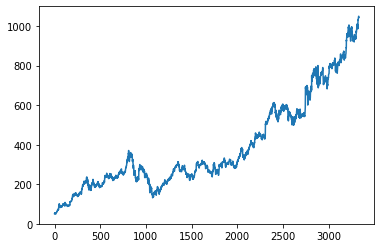

In [ ]:
# Ploteamos los datos de apertura
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(aa)

<Figure size 432x288 with 0 Axes>

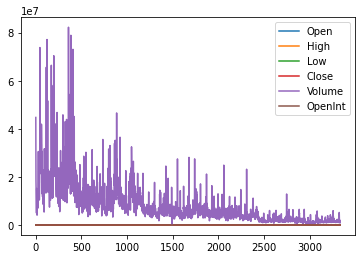

In [ ]:
# Ploteamos todos los datos (solo se ven los de volumen porque los valores son muy grandes)
%matplotlib inline
plt.figure()
dataset.plot()

In [ ]:
# Nos guardamos los datos de apertura y cierra
googl_op = dataset['Open']
googl_cl = dataset['Close']

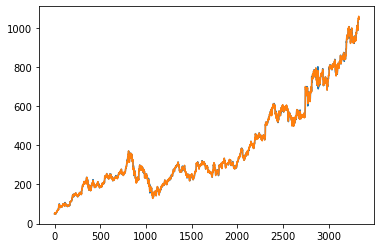

In [ ]:
# Ploteamos los datos de apertura y cierra
%matplotlib inline
plt.figure()
plt.plot(googl_op)
plt.plot(googl_cl)

In [ ]:
# Reordenamos los datos para usarlos después
# Generamos datos de entrada de 10 dias de apertura
# El dato de salida (a predecir) es el de cierre del úúltimo dia
# Partimos en entrenamiento y test
import numpy as np
xx = googl_op.values[np.arange(0,2000,1)]
yy = googl_cl.values[np.arange(0,2000,1)]
                     
X_train = np.reshape(xx,(200,10,1))
y_train = yy[np.arange(9,2000,10)]
                     
xx = googl_op.values[np.arange(2000,3000,1)]
yy = googl_cl.values[np.arange(2000,3000,1)]
X_test = np.reshape(xx,(100,10,1))
y_test = yy[np.arange(9,1000,10)]

In [ ]:
# Dimensiones -> (Número de datos, Número de dimensiones, Número de canales)
X_train.shape

(200, 10, 1)

# MODELO

In [ ]:
# Creamos un modelo sencillo de convolucióón 1D
model = Sequential()
capa_1 = Conv1D(10, kernel_size = (3,), input_shape=(10,1))
model.add(capa_1)
model.add(Flatten())
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')


In [ ]:
# Vemos como es el modelo (capas, parámetros...)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 8, 10)             40        
_________________________________________________________________
flatten (Flatten)            (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 81        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entrenamos el modelo
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
7/7 [==============================] - 0s 7ms/step - loss: 109.2364
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 57.5625
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 14.4746
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 19.8324
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 10.1703
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 12.2281
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 8.9234
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 8.4924
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 8.5576
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 8.2423


In [ ]:
# Predecimos sobre los datos de test
y_hat = model.predict(X_test)

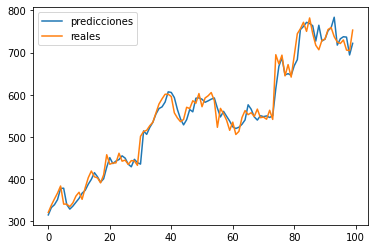

In [ ]:
# Ploteamos las predicciones y los valores reales
# (En la vida real no tendriamos y_test para poder visualizarlos)
%matplotlib inline
plt.figure()
plt.plot(y_hat,label='predicciones')
plt.plot(y_test,label='reales')
plt.legend()

In [ ]:
# Evaluamos sobre los datos de test
# (En la vida real no tendriamos y_test para poder evaluar)
score = model.evaluate(X_test, y_test, batch_size=128)

score